<a href="https://colab.research.google.com/github/zia207/r-colab/blob/main/simple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Regression Analysis

Zia Ahmed, University at Buffalo

Simple regression analysis is a statistical method that examines the relationship between two variables. In particular, it focuses on predicting the value of a dependent variable (y) based on the value of a single independent variable (x).

The simple regression model is typically represented by the equation

y = β0 + β1\*x + ε,

where β0 and β1 are the intercept and slope coefficients, respectively, and ε is the error term.

The slope coefficient (β1) represents the change in the dependent variable for each one-unit increase in the independent variable, while the intercept (β0) represents the value of the dependent variable when the independent variable is equal to zero. The error term (ε) accounts for any unexplained variability in the dependent variable.

Linear regression analysis is based on six fundamental assumptions:

-   The dependent and independent variables show a linear relationship between the slope and the intercept.

-   The independent variable is not random.

-   The value of the residual (error) is zero.

-   The value of the residual (error) is constant across all observations.

-   The value of the residual (error) is not correlated across all observations.

-   The residual (error) values follow the normal distribution

### Install rpy2

In [1]:
!pip uninstall rpy2 -y
!pip install rpy2==3.5.1
%load_ext rpy2.ipython



Found existing installation: rpy2 3.4.2
Uninstalling rpy2-3.4.2:
  Successfully uninstalled rpy2-3.4.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314932 sha256=d039b50a786b16ea90e2b1320be3fa7a189877e590d85c063e080bff21731e76
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2


### Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Install Packages

In [ ]:
%%R
install.packages(c('tidyverse', 'Metrics', 'ggpmisc', 'broom', 'stargazer', 'report', 'performance', 'see'), lib='drive/My Drive/R/', repos='http://cran.rstudio.com/')


### Load Packages

In [ ]:
%%R
.libPaths('drive/My Drive/R')
library(tidyverse)
library(broom)
library(stargazer)
library(report)
library(performance)
library(Metrics)
library(ggpmisc)

### Data

In this exercise we will use **gp_soil_data.csv**, The data can be found [here](https://github.com/zia207/r-colab/tree/main/Data/) for download.


In [6]:
%%R
urlfile = "https://github.com/zia207/r-colab/raw/main/Data/USA/gp_soil_data.csv"
mf<-read_csv(url(urlfile)) %>%
  glimpse()

Rows: 467 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): STATE, COUNTY, NLCD, FRG
dbl (15): ID, FIPS, STATE_ID, Longitude, Latitude, SOC, DEM, Aspect, Slope, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 467
Columns: 19
$ ID        <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 1…
$ FIPS      <dbl> 56041, 56023, 56039, 56039, 56029, 56039, 56039, 56039, 5603…
$ STATE_ID  <dbl> 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, 56, …
$ STATE     <chr> "Wyoming", "Wyoming", "Wyoming", "Wyoming", "Wyoming", "Wyom…
$ COUNTY    <chr> "Uinta County", "Lincoln County", "Teton County", "Teton Cou…
$ Longitude <dbl> -111.0119, -110.9830, -110.8065, -110.7344, -110.7308, -110.…
$ Latitude  <dbl> 41.05630, 42.88350, 44.53497, 44.43289, 44.80635, 44.09124, …
$ SOC       <dbl> 15.763, 15.8


### Fit a Simple Linear Model

In this exercise we will fit a simple linear regression model to explore the relationship between soil organic carbon (SOC) and Normalized Vegetation Index (NDVI) using **lm()** function:

In [7]:
%%R
slm.soc<-lm(SOC~NDVI, data=mf)  # regression model

he **summary()** function is then used to display the summary of the linear model, including the estimated coefficients, standard errors, t-statistics, p-values, and R-squared value.

In [9]:
%%R
summary(slm.soc)


Call:
lm(formula = SOC ~ NDVI, data = mf)

Residuals:
   Min     1Q Median     3Q    Max 
-9.543 -2.459 -0.722  1.362 18.614 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.6432     0.5451  -3.014  0.00272 ** 
NDVI         18.2998     1.1703  15.637  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.089 on 465 degrees of freedom
Multiple R-squared:  0.3446,	Adjusted R-squared:  0.3432 
F-statistic: 244.5 on 1 and 465 DF,  p-value: < 2.2e-16



#### Create Regression Summary Table

With the **tidy()** function from the broom package, you can easily create standard regression output tables.

In [10]:
%%R
broom::tidy(slm.soc)

# A tibble: 2 × 5
  term        estimate std.error statistic  p.value
  <chr>          <dbl>     <dbl>     <dbl>    <dbl>
1 (Intercept)    -1.64     0.545     -3.01 2.72e- 3
2 NDVI           18.3      1.17      15.6  1.35e-44


Another really good option for creating compelling regression and summary output tables is the **stargazer** package.

In [12]:
%%R
stargazer::stargazer(slm.soc,type="text")


                        Dependent variable:    
                    ---------------------------
                                SOC            
-----------------------------------------------
NDVI                         18.300***         
                              (1.170)          
                                               
Constant                     -1.643***         
                              (0.545)          
                                               
-----------------------------------------------
Observations                    467            
R2                             0.345           
Adjusted R2                    0.343           
Residual Std. Error      4.089 (df = 465)      
F Statistic          244.514*** (df = 1; 465)  
Note:               *p<0.1; **p<0.05; ***p<0.01


#### Generate Report

We can generate report for linear model using **report()** function of **report** package:

In [13]:
%%R
report::report(slm.soc)

We fitted a linear model (estimated using OLS) to predict SOC with NDVI
(formula: SOC ~ NDVI). The model explains a statistically significant and
substantial proportion of variance (R2 = 0.34, F(1, 465) = 244.51, p < .001,
adj. R2 = 0.34). The model's intercept, corresponding to NDVI = 0, is at -1.64
(95% CI [-2.71, -0.57], t(465) = -3.01, p = 0.003). Within this model:

  - The effect of NDVI is statistically significant and positive (beta = 18.30,
95% CI [16.00, 20.60], t(465) = 15.64, p < .001; Std. beta = 0.59, 95% CI
[0.51, 0.66])

Standardized parameters were obtained by fitting the model on a standardized
version of the dataset. 95% Confidence Intervals (CIs) and p-values were
computed using a Wald t-distribution approximation.


### Model Performance

The **performance** package provide utilities for computing indices of model quality and goodness of fit. These include measures like, model_performance r-squared (R2), root mean squared error (RMSE) or intraclass correlation coefficient (ICC) , but also functions to check (mixed) models for overdispersion, zero-inflation, convergence or singularity.

#### Model performance summaries

**model_performance** computes indices of model performance for regression models. Depending on the model object, typical indices might be r-squared, AIC, BIC, RMSE, ICC or LOOIC.

In [14]:
%%R
performance::model_performance(slm.soc)

# Indices of model performance

AIC      |     AICc |      BIC |    R2 | R2 (adj.) |  RMSE | Sigma
------------------------------------------------------------------
2644.619 | 2644.671 | 2657.058 | 0.345 |     0.343 | 4.080 | 4.089


Note:
AIC: AIC (Akaike Information Criterion) is a statistical measure used for model selection. It is a way to balance the goodness of fit of a model with the number of parameters in the model.

AICc: AICc (corrected Akaike Information Criterion) is a modification of the AIC statistic that is used to adjust for small sample sizes. AICc is calculated using the formula:

BIC: BIC (Bayesian Information Criterion) is another statistical measure used for model selection, similar to AIC. BIC is also based on the trade-off between model fit and model complexity, but it uses a different penalty for the number of parameters in the model.

RMSE: Root Mean Square Error (RMSE) is a commonly used metric to measure the accuracy of a predictive model. It is used to quantify the difference between the predicted values and the actual values in a dataset. RMSE is calculated by taking the square root of the mean of the squared differences between the predicted and actual values.

R2: R2, or R-squared, is a statistical measure that indicates how well a regression model fits the data. It is also known as the coefficient of determination.

Adjusted R2: Adjusted R2 is a modified version of the R2 statistic that adjusts for the number of independent variables in the regression model. It is used to evaluate the goodness of fit of a regression model, while accounting for the complexity of the model.

Sigma: The sigma of a regression model, also known as the residual standard error, is a measure of the variability of the errors in the regression model. It is a standard deviation of the residuals, which are the differences between the predicted values and the actual values.

#### R-squared and RMSE

In [15]:
%%R
# R-squred
performance::r2(slm.soc)

# R2 for Linear Regression
       R2: 0.345
  adj. R2: 0.343


In [16]:
%%R
# RMSE
performance::performance_rmse(slm.soc)

[1] 4.080156


#### Visualization of model assumptions

The package **performance** provides many functions to check model assumptions, like **check_collinearity()**, **check_normality()** or **check_heteroscedasticity()**. To get a comprehensive check, use check_model().

  multicollinearity.



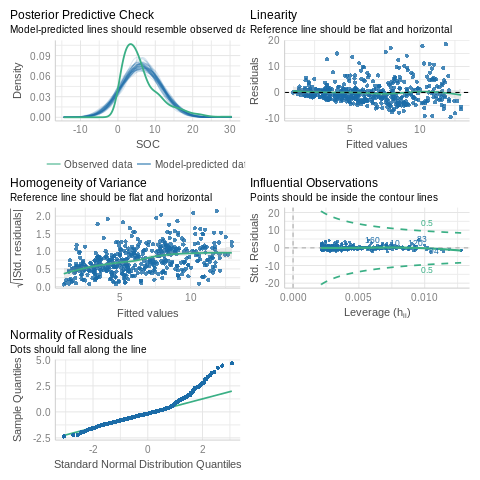

In [18]:
%%R
performance::check_model(slm.soc)

Note:
Posterior predictive: Posterior predictive checks for a linear model involve simulating data sets from the posterior distribution of the model parameters, and then comparing the simulated data sets to the observed data

Linearity: Linearity plots the residuals (i.e., the differences between the observed values and the predicted values) against the independent variable(s). If the plot shows a random pattern with no clear trend, then the linearity assumption is likely to hold. If the plot shows a pattern or trend, then the linearity assumption may be violated.

Homogeneity of variance: Homogeneity of variance can be assessed by examining a scatter plot of the residuals against the predicted values or against the independent variable(s). If the plot shows a random pattern with no clear trend, then the assumption of homogeneity of variance is likely to hold. If the plot shows a pattern or trend, such as increasing or decreasing variance, then the assumption of homogeneity of variance may be violated.

Influential observation : The influential observations in a linear regression model is an observation that has a strong effect on the estimated regression coefficients. These observations can have a large impact on the regression model and can affect the conclusions that are drawn from the analysis. Cook's distance or the leverage statistic is generally use to measure statistical measures of influence. Observations that have high values of Cook's distance or leverage may be influential.

Normality of residuals: It can be assessed by examining a histogram or a normal probability plot of the residuals. If the histogram shows a symmetric bell-shaped distribution, and the normal probability plot shows a roughly straight line, then the assumption of normality is likely to hold. If the histogram or normal probability plot shows departures from normality, such as skewness or outliers, then the assumption of normality may be violated.
:::

### Visualize Linear Model

**ggpmisc** extends the capabilities of ggplot2 for visualization scatter plots of two variables. It provides additional functionality for annotation and customization of ggplot2 plots, including statistical annotations, highlighting subsets of data, and adding equations or text annotations.

**stat_poly_eq()** adds equation and R-squared values to a plot with a linear regression line.

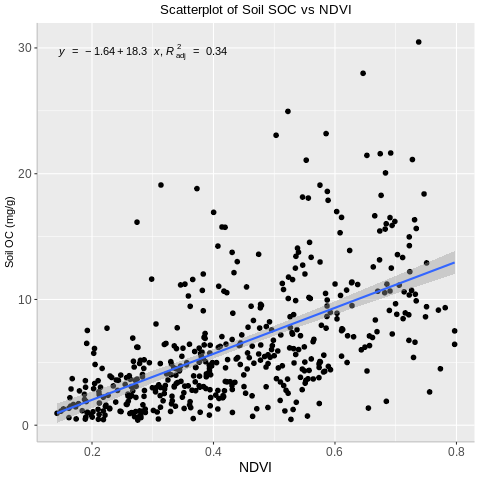

In [22]:
%%R

formula<-y~x
ggplot(mf, aes(x=NDVI, y=SOC)) +
 geom_point(size=2) +
 # draw fitted line
  geom_smooth(method = "lm", formula = formula) +
  stat_poly_eq(use_label(c("eq", "adj.R2")), formula = formula) +
 # add plot title
 ggtitle("Scatterplot of Soil SOC vs NDVI") +
 theme(
    # center the plot title
    plot.title = element_text(hjust = 0.5),
    axis.line = element_line(colour = "gray"),
    # axis title font size
    axis.title.x = element_text(size = 14),
    # X and  axis font size
    axis.text.y=element_text(size=12,vjust = 0.5, hjust=0.5),
    axis.text.x = element_text(size=12))+
  xlab("NDVI") +
  ylab("Soil OC (mg/g)")

### Further Reading

1.  [Regression Basics](https://andrewproctor.github.io/rcourse/module5.html#graphs_in_r)

2.  [report](https://github.com/easystats/report)

3.  [performance](https://easystats.github.io/performance/)

4.  [ggpmisc 0.2.14 User Guide](https://mran.microsoft.com/snapshot/2017-02-04/web/packages/ggpmisc/vignettes/user-guide.html)